In [1]:
!pip install tensorflow

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached grpcio-1.47.0-cp39-cp39-win_amd64.whl (3.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached absl_py-1.1.0-py3-none-any.whl (123 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
 

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
tf.__version__

'2.9.1'

In [4]:
df=pd.read_csv(r"C:\Users\gyanendra singh\Downloads\Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data=df.iloc[:,~df.columns.isin(['RowNumber','CustomerId','Surname'])]

data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = data
dfle.Gender = le.fit_transform(dfle.Gender)
dfle.Geography=le.fit_transform(dfle.Geography)

C:\Users\gyanendra singh\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
dfle

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [11]:
X=dfle.drop(['Exited'],axis=1)
y=dfle.Exited

In [12]:
data.Geography.value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

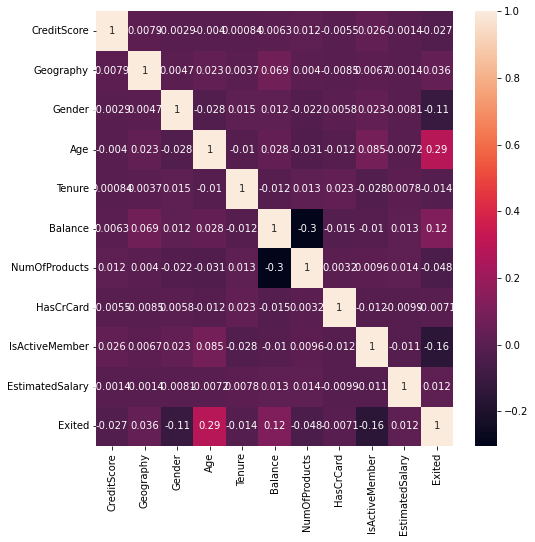

In [34]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(),annot=True)
plt.show()

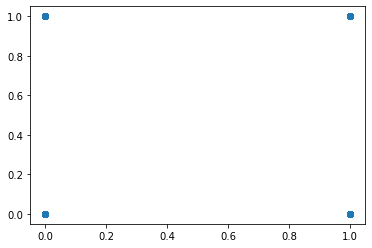

In [13]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [14]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
ann = tf.keras.models.Sequential() #initializing ANN

In [18]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [19]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [20]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))#outputlayer

In [21]:
ann.compile(optimizer='adam' ,loss= 'binary_crossentropy', metrics=['accuracy']) #compoling the ANN

In [22]:
#training ANN for training set
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6073 - accuracy: 0.7206
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7977
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8034
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8129
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8199
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8259
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8338
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8381
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3840 - accura

In [28]:
print(ann.predict(sc.transform([[600,0,1,40,3,60000,2,1,1,50000]])) > 0.5)

1/1 [==============================] - 0s 47ms/step
[[False]]


C:\Users\gyanendra singh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
ann.predict(X_test)

63/63 [==============================] - 0s 515us/step


array([[0.21875226],
       [0.24284598],
       [0.19603908],
       ...,
       [0.07810421],
       [0.16548657],
       [0.11975451]], dtype=float32)

In [41]:
X_test

array([[-0.55204276,  0.3131264 , -1.09168714, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297, -0.89294542, -1.09168714, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  1.51919821, -1.09168714, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227,  1.51919821,  0.91601335, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991,  0.3131264 ,  0.91601335, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688,  0.3131264 ,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.61255917]])